# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [76]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [77]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [79]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [80]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [81]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [82]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [83]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [84]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [85]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [86]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [87]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [88]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [89]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [90]:
data.duplicated().sum()

71

In [91]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [92]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [93]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [94]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [95]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [96]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Доля от общего количества должников:
Нет детей: 61.37%
Один ребенок: 25.64%
Два ребенка:  11.20%
Три и более:  1.79%



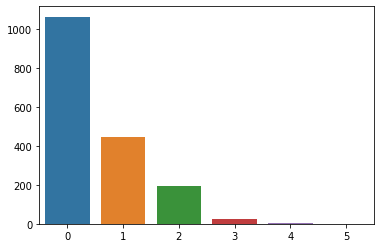

In [97]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
import seaborn as sns
children_debt = data.groupby(by='children')['debt'].sum()

sns.barplot(x=children_debt.index.tolist(), y=children_debt.tolist())

sum_debts = data.groupby(by='children')['debt'].sum().sum()

print(f'''Доля от общего количества должников:
Нет детей: {children_debt[0] / sum_debts:.2%}
Один ребенок: {children_debt[1] / sum_debts:.2%}
Два ребенка:  {children_debt[2] / sum_debts:.2%}
Три и более:  {children_debt[3:5].sum() / sum_debts:.2%}
''')

Доля должников по отношению к своей группе:
Нет детей: 7.54%
Один ребенок: 9.23%
Два ребенка:  9.45%
Три ребенка:  8.18%
Четыре ребенка:  9.76%
Пять детей:  0.00%



<AxesSubplot:>

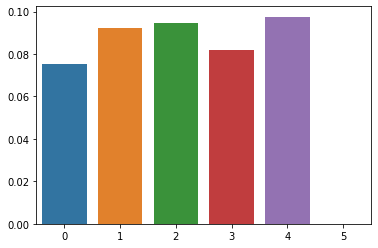

In [98]:
debt_to_debt = children_debt / data.groupby(by='children')['debt'].count()
print(f'''Доля должников по отношению к своей группе:
Нет детей: {debt_to_debt[0]:.2%}
Один ребенок: {debt_to_debt[1]:.2%}
Два ребенка:  {debt_to_debt[2]:.2%}
Три ребенка:  {debt_to_debt[3]:.2%}
Четыре ребенка:  {debt_to_debt[4]:.2%}
Пять детей:  {debt_to_debt[5]:.2%}
''')
sns.barplot(x=debt_to_debt.index.tolist(), y=debt_to_debt.tolist())


           sum  count   precent
children                       
0         1063  14091  0.075438
1          444   4808  0.092346
2          194   2052  0.094542
3           27    330  0.081818
4            4     41  0.097561
5            0      9  0.000000


<AxesSubplot:>

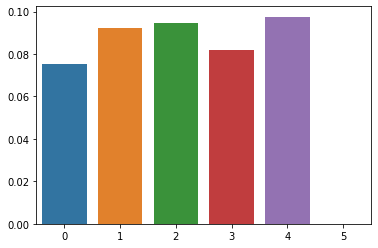

In [135]:
group_children = data.groupby(by='children')['debt'].agg(['sum', 'count'])
group_children['precent'] = group_children['sum'] / group_children['count']
print(group_children)
sns.barplot(x=group_children.index.tolist(), y=group_children['precent'].tolist())

Рисунок 1.

**Вывод:** 
Наибольший процент просроченных кредитов наблюдается среди заёмщиков без детей ввиду высокой численности этой группы, при пересчете по отношению к группе, самая большая доля просроченных платежей наблюдается среди семей с четырьмя, двумя и одним ребенком. Наиболее ответственными кредитополучателями являются заёмщики без детей. Однако выборка не сбалансировна, группы имеют разные размеры.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Доля должников по отношению к группе (%):
 family_status          family_status_id
Не женат / не замужем  4                   9.76
гражданский брак       1                   9.31
женат / замужем        0                   7.56
в разводе              3                   7.06
вдовец / вдова         2                   6.62
Name: debt, dtype: float64


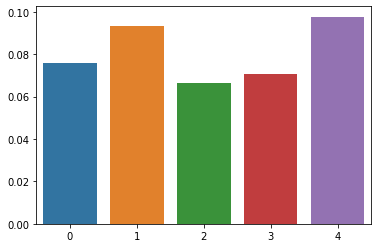

In [122]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
family_status_debt = data.groupby(['family_status', 'family_status_id'])['debt'].sum()
debt_to_debt_family_status = family_status_debt / data.groupby(by='family_status')['debt'].count()

family_status_id = []

for i in range(len(debt_to_debt_family_status)):
    family_status_id.append(debt_to_debt_family_status.index[i][1])

sns.barplot(x=family_status_id, y=debt_to_debt_family_status.tolist())


print('Доля должников по отношению к группе (%):\n', (debt_to_debt_family_status.sort_values(ascending=False) // 0.0001).astype('int') * 0.01)


In [123]:
# группируем должников по семейному положению включая id статуса
family_status_debt_new = data.groupby(['family_status', 'family_status_id'])['debt'].agg(['sum', 'count'])

In [124]:
# производим рассчёт доли должников по каждой группе
family_status_debt_new['percent'] = family_status_debt_new['sum'] / family_status_debt_new['count']

In [125]:
# переносим id статуса из индекса в столбец для формирования диаграммы
family_status_debt_new['index'] = family_status_debt_new.index.get_level_values(1)

                       sum  count   percent  index
family_status                                     
Не женат / не замужем  273   2796  0.097639      4
в разводе               84   1189  0.070648      3
вдовец / вдова          63    951  0.066246      2
гражданский брак       385   4134  0.093130      1
женат / замужем        927  12261  0.075606      0


<AxesSubplot:>

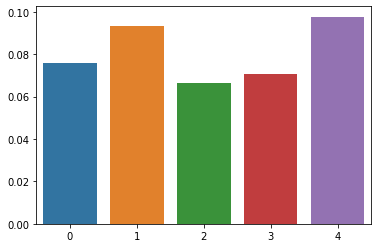

In [126]:
# избавляемся от лишнего индекса и выводим данные
family_status_debt_new = family_status_debt_new.droplevel(level=1)
print(family_status_debt_new)
sns.barplot(x=family_status_debt_new['index'].tolist(), y=family_status_debt_new['percent'].tolist())

Рисунок 2.

**Вывод:** Наибольшая доля должников в категории "Не женат / не замужем" и "гражданский брак". Женатые/замужние или бывшие в браке проявляют большую ответственность при взврате средств.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь также верно. Кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные. Получается, что узаконенные отношения ведут к более ответственному отношению к своим обязательствам. Ну вроде как совпадает со здравым смыслом - семейные люди более скрупулёзно берегут свой семейное спокойствие и несут за него ответственность.
</div>


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

                        sum  count
total_income_category             
A                         2     25
B                       354   5014
C                      1353  15921
D                        21    349
E                         2     22
Доля должников по отношению к группе (%):
 total_income_category
E    9.09
C    8.49
A    7.99
B    7.06
D    6.01
Name: debt, dtype: float64
Сумма дохода:
до 30000 — 'E'
до 50000 — 'D'
до 200000 — 'C'
до 1000000 — 'B'
свыше 1000000 — 'A'


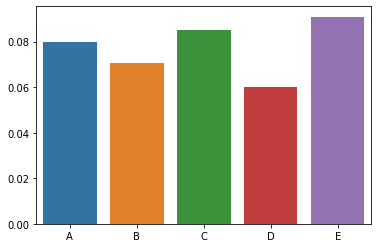

In [140]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
total_income_debt = data.groupby(['total_income_category'])['debt'].sum()
#Новый вариант с mean()
debt_to_debt_total_income = data.groupby(by='total_income_category')['debt'].mean()

print(data.groupby(by='total_income_category')['debt'].agg(['sum', 'count']))

#закомментировал старый вариант
#debt_to_debt_total_income = total_income_debt / data.groupby(by='total_income_category')['debt'].count()

sns.barplot(x=total_income_debt.index.tolist(), y=debt_to_debt_total_income.tolist())

print('Доля должников по отношению к группе (%):\n', (debt_to_debt_total_income.sort_values(ascending=False) // 0.0001).astype('int') * 0.01)
print('''Сумма дохода:
до 30000 — 'E'
до 50000 — 'D'
до 200000 — 'C'
до 1000000 — 'B'
свыше 1000000 — \'A\'''')

Рисунок 3.

**Вывод:** Прямой зависиости между уровнем дохода и возвратом кредита в срок не наблюдается. Но общая тенденция говорит о том, что с повышением уровня дохода, вероятность возвращения кредита в срок выше.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Доля должников по отношению к группе:
                    category   percent
1    операции с автомобилем  0.093480
2     получение образования  0.092528
3        проведение свадьбы  0.079118
4  операции с недвижимостью  0.072551


<AxesSubplot:>

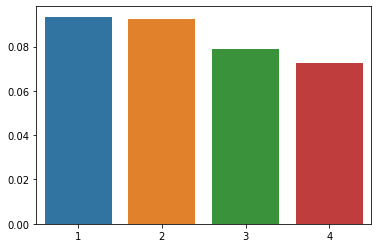

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
purpose_debt = data.groupby(['purpose_category'])['debt'].sum()
debt_to_debt_purpose = purpose_debt / data.groupby(by='purpose_category')['debt'].count()
debt_to_debt_purpose_nums = pd.DataFrame(data = debt_to_debt_purpose.sort_values(ascending=False).index.tolist(), index=[1,2,3,4])
debt_to_debt_purpose_nums['percent'] = debt_to_debt_purpose.sort_values(ascending=False).tolist()

debt_to_debt_purpose_nums = debt_to_debt_purpose_nums.rename(columns={0: "category"})

print('Доля должников по отношению к группе:\n', debt_to_debt_purpose_nums)
print(data.groupby(by='purpose_category')['debt'].agg(['sum'])

sns.barplot(x=debt_to_debt_purpose_nums.index.tolist(), y=debt_to_debt_purpose_nums['percent'].tolist())

Рисунок 4.

**Вывод:** Наиболее высокий риск просрочки в категориях "операции с автомобилем" и "получение образования". Наибольшую надежность среди выплат имеют кредиты на недвижимость.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски наблюдались в столбцах содержацих информацию о доходе и трудовом стаже. Учитывая, что пропуски наблюдались у клиентов имеющих работу, то возможна техническая ошибка.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнение пропусков медианным значением позволит избежать критических искажений в расчётах. Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства.  Также это позволит избежать чрезмерного удаления строк и более качественно собрать статистику по другим столбцам. Если в пропущенных значениях проставить ноль, то изменится медиана и среднее значение в меньшую сторону, данные станут недостоверными.

### Шаг 4: общий вывод.

**В ходе анализа статистики о платежеспособности клиентов были выявлены факторы, влияющие на своевременное погашение кредитов заёмщиками. В связи с чем было выдвинуто несколько гипотез:**

- Гипотеза 1: существует зависимость между количеством детей и возвратом кредита в срок;
- Гипотеза 2: существует зависимость между семейным положением и возвратом кредита в срок;
- Гипотеза 3: существует зависимость между уровнем дохода и возвратом кредита в срок;
- Гипотеза 4: существует зависимость между целью кредита влияют на его возврат в срок.

**Гипотеза 1 подтверждает зависимость между своевременным возвратом и наличием детей. Однако для определения надежности заемщика необходимо больше данных из групп имеющих 3 и более детей.** (Рисунок 1)

Таким образом, доля просроченных кредитов:

- 7.5% без детей;
- 9.2% один ребенок;
- 9.4% два ребенка.

Рекомендация: провести анализ большей выборки данных.

**Гипотеза 2 подтвердена. Существует прямая зависимость между семейным положением и надежностью клиента. Как правило, люди состоящие или состоявшие в браке чаще возвращают кредиты в срок.** (Рисунок 2)

Разница между двумя группами более 18%, что говорит о бысоком влиянии фактора на платежеспособность.

Рекомендация: есть смысл сократить количество категорий до двух состоящие/состоявшие и не состощие/не состоявщие в браке.

**Гипотеза 3 не подтверждена. Для определения влияния уровня дохода на платежеспособность, клинеты были поделены на категории в зависимости от заработка.** (Рисунок 3)
до 30000 — 'E', 
до 50000 — 'D', 
до 200000 — 'C', 
до 1000000 — 'B', 
свыше 1000000 — 'A'. 

Наибольшая доля просроченных кредитов наблюдается в категории Е - 9%, однако в данной категории предсталено недостоточно клиентов для формирования конечного вывода. Если объединить эту категорию клиентов с группой D, то получится, что наибольший процент невыплат приходится на категорию С - 8.49% т.е. клиентов с доходом от 50 до 200 тыс. руб.

Рекомендация: для определение зависимости между заработком клиента и надежностью, необходима информация о размере займа.

**Гипотеза 4 подтверждена. Статистика в данной категории следующая:** (Рисунок 4)

- 9,3% операции с автомобилем;
- 9,2% получение образования;
- 7,9% проведение свадьбы;
- 7,2% операции с недвижимостью.

Наиболее высокий риск просрочки в категориях операции с автомобилем и получение образования. Наибольшую надежность среди выплат имеют кредиты на недвижимость и проведение свадьбы.

Рекомендация: собрать информацию по большему количеству целей. Например туризм, бизнес и т.д.

**Общие рекомендации:**
- При построении модели кредитного скоринга, можно использовать зависимости из первой (с корретировками), второй и четвертой гипотез (количество детей, семейное положение, цель кредита)

- Необходимо дополнить выборку для уточнения первой и проверки третьей гипотез.